## Zaawansowane Metody Inteligencji Obliczeniowej
# Zadanie domowe 2
### Prowadzący: Michał Kempka, Marek Wydmuch
### Autor: Adam Marciniak + 141273

## Wprowadzenie

Całe zadanie jest oparte o różne wersje środowiska `FrozenLake` ze znanej biblioteki OpenAI Gym (https://gym.openai.com), która agreguje różnego rodzaju środowiska pod postacią jednego zunifikowanego API.

Zapoznaj się z opisem środowiska (https://gym.openai.com/envs/FrozenLake-v0), a następnie zapoznaj się z kodem poniżej. Pokazuje on podstawy użytkowania API biblioteki Gym.

#### Uwaga: Możesz dowolnie modyfikować elementy tego notebooka (wstawiać komórki i zmieniać kod) o ile nie napisano gdzieś inaczej.

In [ ]:
# Zainstaluj bibliotekę OpenAI Gym w wersji 0.18.0
!pip install gym==0.18.0 --quiet

     |████████████████████████████████| 1.6 MB 24.3 MB/s 


In [ ]:
# Zaimportuj środowisko FrozenLake z OpenAI Gym
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv 

# Stwórzmy deterministyczne (`is_slippper=False`) środowisko w oparciu o jedną z zpredefiniowanych map (`map_name="4x4"`)
env = FrozenLakeEnv(map_name="4x4", is_slippery=False) 

# Po stworzeniu środowiska musimy je zresetować 
env.reset()
# W każdym momencie możemy wyświetlić stan naszego środowiska przy użyciu fukcji `render`
env.render()


SFFF
FHFH
FFFH
HFFG


In [ ]:
from pprint import pprint

# Najważniejsze pola środowiska, na potrzeby tego zadania załóżmy, że mamy dostęp do nich wszystkich 
# (oczywiście dla niektórych środowisk w OpenAI Gym tak nie jest)
print("Przestrzeń akcji: ", env.action_space) # Akcje od 0 do 3: LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3
print("Przestrzeń obserwacji: ", env.observation_space) # Stany od 0 do 15
print("Opis środowiska (mapa):")
print(env.desc)
print("Model przejść w środowisku:")
pprint(env.P) # gdzie P[s][a] == [(probability, nextstate, reward, done), ...]
print("Aktualny stan: ", env.s)

Przestrzeń akcji:  Discrete(4)
Przestrzeń obserwacji:  Discrete(16)
Opis środowiska (mapa):
[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]
Model przejść w środowisku:
{0: {0: [(1.0, 0, 0.0, False)],
     1: [(1.0, 4, 0.0, False)],
     2: [(1.0, 1, 0.0, False)],
     3: [(1.0, 0, 0.0, False)]},
 1: {0: [(1.0, 0, 0.0, False)],
     1: [(1.0, 5, 0.0, True)],
     2: [(1.0, 2, 0.0, False)],
     3: [(1.0, 1, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)],
     1: [(1.0, 6, 0.0, False)],
     2: [(1.0, 3, 0.0, False)],
     3: [(1.0, 2, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)],
     1: [(1.0, 7, 0.0, True)],
     2: [(1.0, 3, 0.0, False)],
     3: [(1.0, 3, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, False)],
     1: [(1.0, 8, 0.0, False)],
     2: [(1.0, 5, 0.0, True)],
     3: [(1.0, 0, 0.0, False)]},
 5: {0: [(1.0, 5, 0, True)],
     1: [(1.0, 5, 0, True)],
     2: [(1.0, 5, 0, True)],
     3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0.0, True)

In [ ]:
# Nasz agent może wejść w interakcje ze środowiskiem  poprzez wywołanie funkcji `step(action)`, 
# gdzie `action` to jedna z możliwych akcji (int od 0 do env.action_space.n - 1)
s = env.reset() # `reset()` zwraca początkowy stan
env.render()
for i in range(5):
    # Wybierzmy losową akcje
    random_a = env.action_space.sample() 
    # `step(action)` zwraca nowy stan (`s`), nagrodę (`r`), informację czy stan jest terminalny (`term`) 
    # oraz dodatkowe informacje, które pomijamy
    # w tym wypadku nowy stan to jedynie id, ale dla innych środowisk może być to innym typ reprezentujący obserwację
    s, r, term, _ = env.step(random_a) 
    env.render()
    if term:
        break


SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


## Zad. 1 - Policy iteration + value iteration (10 pkt.)

W komórkach poniżej zaimplementuj algorytmy **iteracji polityki** oraz **iteracji wartości**, wyznaczające deterministyczną politykę dla środowiska FrozenLake.

Odpowiedź na pytania wykonując odpowiednie eksperymenty (zostaw output odpowiednich komórek na poparcie swoich twierdzeń):
- Jak zmiana współczynniku `gamma` wpływa na wynikową politykę?
- Jak stochastyczność wpływa na liczbę iteracji potrzebnych do zbiegnięcia obu algorytmów oraz wynikową politykę?

#### Uwaga: nie zmieniaj nazwy funkcji `policy_iteration` i `value_iteration`, ani ich argumentów. Nie dopisuj do komórek z funkcjami innego kodu. Może zdefiniować funkcje pomocnicze dla danej funkcji w tej samej komórce (sprawdzarka wyciągnie ze zgłoszonego notebooka wyłącznie komórki zawierającą funkcje `policy_iteration` i `value_iteration` do sprawdzenia, kod w innych komórkach nie będzie widziany przez sprawdzarkę!)

Odpowiedzi:
- **Jak zmiana współczynniku gamma wpływa na wynikową politykę?**

Wraz z podnoszeniem współczynnika `gamma` oczekiwane nagrody akcji podejmowanych w przyszłości stają się bardziej preferowane nad oczekiwaną nagrodę danej akcji w obecnym stanie. Współczynnik ten zdaje suę nie wpływać na algorytm iteracji polityki, natomiast w przypadku algorytmu iteracji wartości przyjęcie za `gammę` wartości nie większej niż 0.5 skutkuje regularnym kończeniem agenta w dziurze. Dopiero dla większych wartości tego wspołczynnika udaje się temu algorytmowi znaleźć politykę, która osiąga pole oznaczone jako cel.

- **Jak stochastyczność wpływa na liczbę iteracji potrzebnych do zbiegnięcia obu algorytmów oraz wynikową politykę?**

Stochastyczność sprawia, że wynikowa polityka nie zawsze doprowadzi agenta do osiągnięcia celu.

W przypadku algorytmu iteracji polityki dla środowiska stochastycznego liczba iteracji zmieniała się w niereguralny sposób dla kolejnych wartości współczynnika gamma, więc można zaryzykować stwierdzenie, że w przypadku tego algorytmu stochastyczność nie wpływa na ilość iteracji.

W przypadku algorytmu iteracji wartości, stochastyczność środowiska zdaje się wpływać na ilość iteracji. Dla środowiska bez poślizgów ilość iteracji szybko rosła dla współczynnika gamma z zakresu (0.5; 0.6), a następnie stabilizowała się. W przypadku środowiska z poślizgiem liczba iteracji zaczyna powoli rosnąć w okolicy wartości gamma równej 0.6, przy czym prędkość tego wzrostu jest coraz szybsza dla większych wartości gamma (0.9, 0.95). Można więc stwierdzić, że w tym przypadku stochastyczność zwiększa liczbę iteracji potrzebnych do zbiegnięcia algorytmu iteracji wartości, zwłaszcza dla większych wartości `gamma`. Należy jednak zaznaczyć, że liczba iteracji w środowisku z poślizgiem zrównuje się ze środowiskiem bez poslizgu dopiero dla `gamma = 0.8` i dopiero od tego progu jest większa niż w środowisku deterministycznym.

*( Odpowiedni output znajduje się parę komórek niżej )*

In [ ]:
from numpy import argmax


def policy_iteration(P, gamma, delta=0.001):
    """
    Argumenty:
        P - model przejścia, gdzie P[s][a] == [(probability, nextstate, reward, done), ...]
        gamma - współczynnik dyskontujący
        delta - tolerancja warunku stopu
    Zwracane wartości:
        V - lista o długości len(P) zawierający oszacowane wartość stanu s: V[s]
        pi - lista o długości len(P) zawierający wyznaczoną deterministyczną politykę - akcję dla stanu s: pi[s]
        i - ilość iteracji algorytmu po wszystkich stanach
    """
    V = [0.0] * len(P)
    pi = [0] * len(P)
    i = 0
    delta_min = delta
    
    # Miejsce na twoją implementację
    # P[s][a] == [(probability, nextstate, reward, done), ...]
    stop = False
    while stop is False:
        i += 1

        # ewaluacja polityki
        while True:
            delta = 0
            for s in P:
                v = V[s]
                V[s] = sum(p*(r + gamma*V[next_s]) for p, next_s, r, _  in P[s][pi[s]])
                delta = max(delta, abs(v - V[s]))
            if delta < delta_min:
                break
        
        # polepszanie polityki
        stop = True
        for s in P:
            a_now = pi[s]
            exp_rewards = []
            for a in P[s]:
                exp_rewards.append( sum(p*(r + gamma*V[next_s]) for p, next_s, r, _  in P[s][a]) )
            pi[s] = argmax(exp_rewards)
            if a_now != pi[s]:
                stop = False
    
    return V, pi, i

In [ ]:
from numpy import argmax


def value_iteration(P, gamma, delta=0.001):
    """
    Argumenty:
        P - model przejścia, gdzie P[s][a] == [(probability, nextstate, reward, done), ...]
        gamma - współczynnik dyskontujący
        delta - tolerancja warunku stopu
    Zwracane wartości:
        Q - lista o długości len(P) zawierający listy z oszacowanymi wartościami dla stanu s i akcji a: Q[s][a]
        pi - lista o długości len(P) zawierający wyznaczoną deterministyczną politykę - akcję dla stanu s: pi[s]
        i - ilość iteracji algorytmu po wszystkich stanach
    """
    pi = [0] * len(P)
    Q = [[0.0] * len(P[s]) for s in P.keys()]
    i = 0
    delta_min = delta
    V = [0.0] * len(P)
    
    # Miejsce na twoją implementację
    # P[s][a] == [(probability, nextstate, reward, done), ...]
    while True:
        i += 1
        delta = 0
        for s in P:
            v = V[s]
            exp_rewards = []
            for a in P[s]:
                exp_rewards.append( sum(p*(r + gamma*V[next_s]) for p, next_s, r, _  in P[s][a]) )
                Q[s][a] = sum(p*(r + gamma*max(Q[next_s])) for p, next_s, r, _  in P[s][a])
            V[s] = max(exp_rewards)
            delta = max(delta, abs(v - V[s]))
            
        if delta < delta_min:
            break
    
    for s in P:
        exp_rewards = []
        for a in P[s]:
            exp_rewards.append( sum(p*(r + gamma*V[next_s]) for p, next_s, r, _  in P[s][a]) )
        pi[s] = argmax(exp_rewards)
    
    return Q, pi, i

In [ ]:
# Przykładowy kod do testowania zaimplementowanych metod

# Zaimportuj generator map dla środowiska FrozenLake z OpenAI Gym
from gym.envs.toy_text.frozen_lake import generate_random_map

# Wygeneruj losową mapę jeziora o zadanym rozmiarze (`size=`)
lake_map = generate_random_map(size=4)

# Stwórz środowisko w oparciu o wygenerowaną mapę, 
# sprawdz deterministyczną (`is_slippery=False`) jak i stochastyczną wersję środowiska (`is_slippery=True`)
env = FrozenLakeEnv(desc=lake_map, is_slippery=True)
# env = FrozenLakeEnv(map_name="4x4", is_slippery=False)
env.reset()
env.render()


SFFF
FFFF
FHFF
FHFG


In [ ]:
V, pi1, i = policy_iteration(env.P, 0.9)
Q, pi2, i = value_iteration(env.P, 0.9)

In [ ]:
# Wprowadzmy teraz funkcję, które empirycznie zewauluje naszą politykę
# po prostu rozgrywając odpowiednią liczbę episodów zgodnie z naszą polityką.
def evaluate_empiricaly(env, pi, episodes=1000, max_actions=100):
    mean_r = 0
    for e in range(episodes):
        s = env.reset()
        total_r = 0
        for _ in range(max_actions): # Na wypadek polityki, która nigdy nie dojdzie od stanu terminalnego
            s, r, final, _ = env.step(pi[s])
            total_r += r
            if final:
                break
        mean_r = mean_r + 1/(e + 1) * (total_r - mean_r)
    return mean_r       

In [ ]:
evaluate_empiricaly(env, pi2)

1.0

Finished testing policy iteration with slippery=False
Finished testing value_iteration with slippery=False
Finished testing policy iteration with slippery=True
Finished testing value_iteration with slippery=True


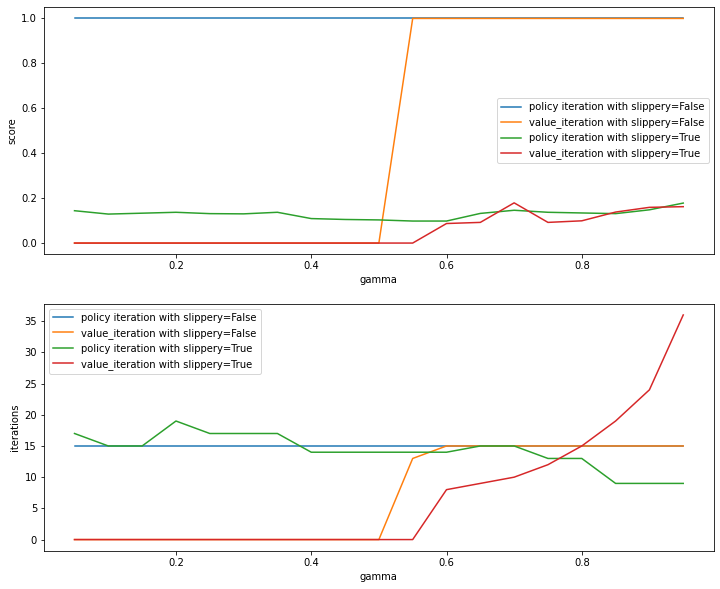

In [ ]:
import matplotlib.pyplot as plt
from numpy import arange

def do_some_testing(env, iteration_type, slippery, gammas):
    scores = []
    iters = []
    for gamma in gammas:
        score, iter = 0, 0
        tests = 10 if slippery else 1
        for _ in range(tests):
            X, pi, i = iteration_type(env.P, gamma)
            s = evaluate_empiricaly(env, pi)
            if s > score:
                score = s
                iter = i
        scores.append(score)
        iters.append(iter)

    return scores, iters


lake_map = generate_random_map(size=8)
fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(12, 10)
gammas = arange(0.05, 1, 0.05)

for slippery in [False, True]:
    env = FrozenLakeEnv(desc=lake_map, is_slippery=slippery)
    for (iteration_type, iteration_name) in [(policy_iteration, "policy iteration"), (value_iteration, "value_iteration")]:
        scores, iters = do_some_testing(env, iteration_type, slippery, gammas)
        ax1.plot(gammas, scores, label=f"{iteration_name} with slippery={slippery}")
        ax2.plot(gammas, iters, label=f"{iteration_name} with slippery={slippery}")
        print(f"Finished testing {iteration_name} with slippery={slippery}")

ax1.set_ylabel('score')
ax2.set_ylabel('iterations')
ax1.set_xlabel('gamma')
ax2.set_xlabel('gamma')
ax1.legend()
ax2.legend()

plt.show()

# teoretycznie wykres powinien być punktowy, ale liniowy jest bardziej czytelny

## Zad. 2 - Monte Carlo (10 pkt.)
W komórce poniżej zaimplementuj metodę **On-policy Monte Carlo** dla polityki epsilon-greedy.
Zakładamy, że model przejść nie jest w tym wypadku dla nas dostępny,
dlatego możesz używać wyłącznie metod `env.reset()` i `env.step()`
w swojej implementacji, w celu wygenerowania nowego epizodu.

- Zaproponuj warunek stopu dla swojej implementacji.
- Jaki jest wpływ epsilony na działanie algorytmu?
- Jaka prosta modyfikacja nagród środowiska przyśpieszyłaby odkrywanie dobrej polityki? Zmodyfikuj env.P i zademonstruj.

Tip: z racji, że env.P jest dostępne, możesz porównać wyniki `on_policy_eps_greedy_monte_carlo` ze wynikami `value_iteration`. 

#### Uwaga: nie zmieniaj nazwy funkcji `on_policy_eps_greedy_monte_carlo`, ani jej pierwszych argumentów (możesz dodać nowe argumenty z wartościami domyślnymi). Nie dopisuj do komórki z funkcją innego kodu. Może zdefiniować funkcje pomocnicze dla funkcji w tej samej komórce (sprawdzarka wyciągnie ze zgłoszonego notebooka wyłącznie komórkę zawierającą funkcję `on_policy_eps_greedy_monte_carlo` do sprawdzenia, kod w innych komórkach nie będzie widziany przez sprawdzarkę!).

Odpowiedź:

- Zaproponuj warunek stopu dla swojej implementacji.

W swojej implementacji jako warunek stopu przyjąłem ilość iteracji, w której nie nastąpiła poprawa wartości sumy elementów tablicy Q o co najmniej  `min_delta`.

- Jaki jest wpływ epsilony na działanie algorytmu?

Prawdopodobieństwo losowej eksploracji przy małych wartościach epsilon jest małe, przez co algorytm z reguły nie zbiega w wyznaczonej liczbie iteracji. Z drugiej strony, duże wartości epsilon powodują, że algorytm zaczyna działać zbyt losowo, przez co znajdowane przez niego polityki nie zawsze okazują się dobre. Algorytm znajduje z reguły najlepsze polityki dla epsilonów z zakresu (0.35; 0.65). 

- Jaka prosta modyfikacja nagród środowiska przyśpieszyłaby odkrywanie dobrej polityki? Zmodyfikuj env.P i zademonstruj.

Można karać agenta za wskakiwanie do dziury, ustawiając wartość nagrody dla takich akcji na jakąś wartość ujemną. Środowisko ze zmodyfikowanymmi nagrodami i wynik testu znajdują się na samym dole notebooka.

In [ ]:
import numpy as np


def create_episode(env, pi, max_episode_len):
    episode = []
    rewards = []
    s = env.reset()
    for _ in range(max_episode_len):
        a_st = np.arange(len(pi[s]))
        a = np.random.choice(a_st, 1, p=pi[s])[0]
        next_s, r, final, _ = env.step(a)
        episode.append({'s': s, 'a': a})
        rewards.append(r)
        if final:
            break
        else:
            s = next_s

    return episode, rewards



def on_policy_eps_greedy_monte_carlo(env, eps, gamma, min_delta=0.0001, max_iters_wo_improvement=10000, max_actions=100):
    """
    Argumenty:
        env - środowisko implementujące metody `reset()` oraz `step(action)`
        eps - współczynnik eksploracji
        gamma - współczynnik dyskontujący
        min_delta - minimalna wartość o jaką musi poprawić się sumaryczna ocena stanów Q
        max_iters_wo_improvement - maksymalna ilość iteracji bez znalezienia lepszej polityki (warunek stopu)
        max_actions - maksymalna liczba podjętych akcji w jednym epizodzie
    Zwracane wartości:
        Q - lista o długości len(P) zawierający listy z oszacowanymi wartościami dla stanu s i akcji a: Q[s][a]
        final_pi - lista o długości len(P) zawierający wyznaczoną deterministyczną (zachłanną) politykę - akcję dla stanu s: pi[s]
        i - ilość epizodów wygenerowanych przez algorytm
    """
    pi = np.array([[1.0/len(env.P[s]) for _ in env.P[s]] for s in env.P.keys()])
    Q = [[0.0] * len(env.P[s]) for s in env.P.keys()]
    Returns = [[0.0] * len(env.P[s]) for s in env.P.keys()]
    N = [[0] * len(env.P[s]) for s in env.P.keys()]
    i = 0

    # Miejsce na twoją implementację
    without_improvement = 0
    best_pi = pi.copy()
    best_q = 0.0

    while without_improvement < max_iters_wo_improvement:
        ep, rews = create_episode(env, pi, max_actions)
        i += 1
        G = 0
        for t in range(len(ep)-1, -1, -1):
            s = ep[t]['s']
            a = ep[t]['a']
            r = rews[t]
            G = gamma*G + r
            if (ep[t] not in ep[:t]):
                Returns[s][a] += G
                N[s][a] += 1
                Q[s][a] = Returns[s][a] / N[s][a]
                A_star = np.argmax(Q[s])
                A_st_size = len(env.P[s])
                pi[s][:] = eps/A_st_size
                pi[s][A_star] = 1 - eps + eps/A_st_size
          
        current_q = np.sum(Q)
        if current_q - best_q > min_delta:
            without_improvement = 0
            best_pi = pi.copy()
            best_q = current_q
            # print(f"Best policy changed at iter #{i}, Q = {best_q}")
        else:
            without_improvement += 1

    final_pi = (np.argmax(best_pi, axis=1)).tolist()  # najlepsze ruchy w każdym stanie    
    
    return Q, final_pi, i

eps	score	iters
0.05	0.000	10000
0.10	0.255	36518
0.15	0.211	42336
0.20	0.212	42429
0.25	0.257	44881
0.30	0.040	10775
0.35	0.500	12056
0.40	0.637	35468
0.45	0.195	11713
0.50	0.230	11364
0.55	0.457	32687
0.60	0.078	10544
0.65	0.675	34116
0.70	0.107	10570
0.75	0.127	10752
0.80	0.044	10116
0.85	0.126	10385
0.90	0.093	10863
0.95	0.106	12528


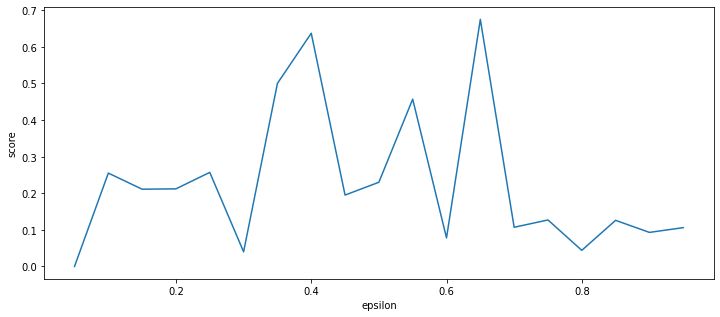

In [ ]:
map_size = 8
test_map = generate_random_map(size=map_size)
test_env = FrozenLakeEnv(desc=test_map, is_slippery=True)

epsilons = np.arange(0.05, 1, 0.05)
scores = []
print("eps\tscore\titers")
for eps in epsilons:
    Q, pi, iters = on_policy_eps_greedy_monte_carlo(test_env, eps, gamma=0.6, max_actions=int(1.5*map_size*map_size))
    s = evaluate_empiricaly(test_env, pi)
    print(f"{eps:.2f}\t{s:.3f}\t{iters}")
    scores.append(s)
    
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.plot(epsilons, scores)
plt.xlabel("epsilon")
plt.ylabel("score")

plt.show()

Regular finished
Modified rewards finished


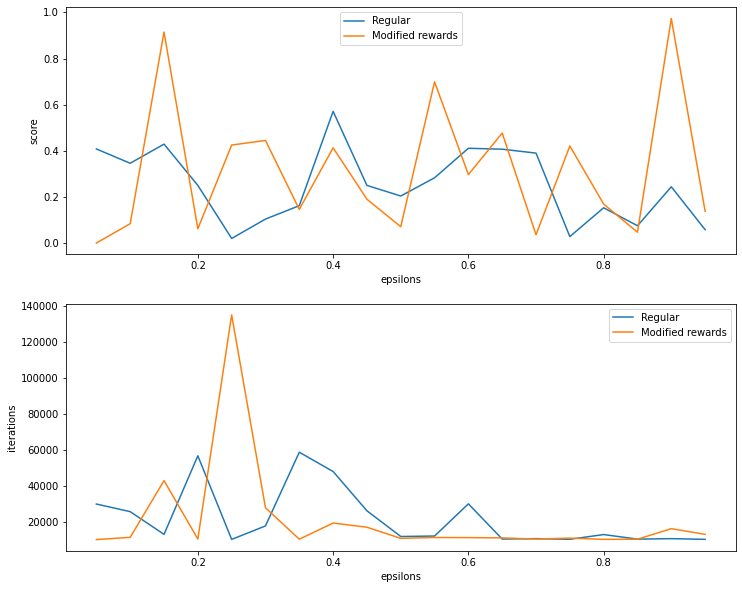

In [ ]:
regular_env = FrozenLakeEnv(map_name="8x8", is_slippery=True)
modified_env = FrozenLakeEnv(map_name="8x8", is_slippery=True)
map_size = 8 

for s in modified_env.P:
    for a in modified_env.P[s]:
        for i, (probability, nextstate, reward, done) in enumerate(modified_env.P[s][a]):
            if done and reward != 1 and probability < 1:
                modified_env.P[s][a][i] = (probability, nextstate, -1, done)


fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(12, 10)
epsilons = np.arange(0.05, 1, 0.05)

for env, name in [(regular_env, "Regular"), (modified_env, "Modified rewards")]:
    scores = []
    iters = []
    for eps in epsilons:
        Q, pi, i = on_policy_eps_greedy_monte_carlo(test_env, eps, gamma=0.6, max_actions=int(1.5*map_size*map_size))
        s = evaluate_empiricaly(test_env, pi)
        scores.append(s)
        iters.append(i)

    ax1.plot(epsilons, scores, label=f"{name}")
    ax2.plot(epsilons, iters, label=f"{name}")
    print(f"{name} finished")

ax1.set_ylabel('score')
ax2.set_ylabel('iterations')
ax1.set_xlabel('epsilons')
ax2.set_xlabel('epsilons')
ax1.legend()
ax2.legend()

plt.show()

Można zauważyć, że po modyfikacji nagród odkrywane są lepsze polityki i (z reguły) znalezienie dobrej polityki trwa znacznie mniej iteracji.